In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
meta = pd.DataFrame.from_csv('../raw/samples.all.txt', sep='\t')

In [4]:
meta.columns

Index(['ox_code', 'src_code', 'sra_sample_accession', 'population', 'country',
       'region', 'contributor', 'contact', 'year', 'm_s', 'sex', 'n_sequences',
       'mean_coverage', 'latitude', 'longitude', 'kt_2la', 'kt_2rb',
       'kdr_1014', 'rdl_296', 'f_roh_100kb', 'count_roh_100kb',
       'sum_roh_100kb', 'pca_3R_free_pc1', 'pca_3R_free_pc2',
       'pca_3R_free_pc3', 'pca_3R_free_pc4', 'pca_3L_free_pc1',
       'pca_3L_free_pc2', 'pca_3L_free_pc3', 'pca_3L_free_pc4', 'pca_2La_pc1',
       'pca_2La_pc2', 'pca_2La_pc3', 'pca_2La_pc4', 'pca_2Rb_pc1',
       'pca_2Rb_pc2', 'pca_2Rb_pc3', 'pca_2Rb_pc4'],
      dtype='object')

# Non-genomic metadata

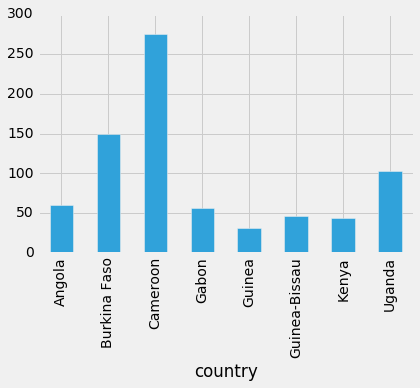

In [25]:
country = meta.groupby('country').size().plot.bar
country()

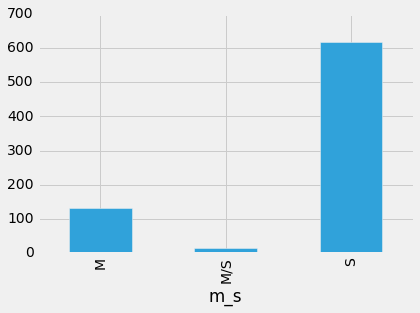

In [26]:
form = meta.groupby(['m_s']).size().plot.bar
form()

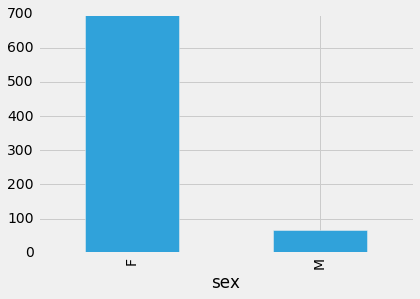

In [27]:
sex = meta.groupby(['sex']).size().plot.bar
sex()

## Genomic metadata

In [7]:
meta['mean_coverage'].describe()

count    765.000000
mean      31.734601
std        9.258979
min       14.210000
25%       27.350000
50%       30.540000
75%       34.340000
max       98.480000
Name: mean_coverage, dtype: float64

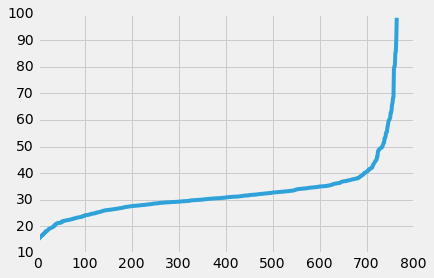

In [35]:
coverage_vals = meta['mean_coverage'].sort_values(inplace=False).values
plt.plot(coverage_vals)

# Better looking plots

In [8]:
print(plt.style.available)

['seaborn-dark', 'seaborn-muted', 'seaborn-notebook', 'fivethirtyeight', 'seaborn-whitegrid', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-ticks', 'seaborn-dark-palette', 'dark_background', 'seaborn-white', 'seaborn-bright', 'seaborn-colorblind', 'ggplot', 'seaborn-paper', 'seaborn-talk', 'grayscale', 'seaborn-pastel', 'bmh', 'seaborn-poster', 'classic']


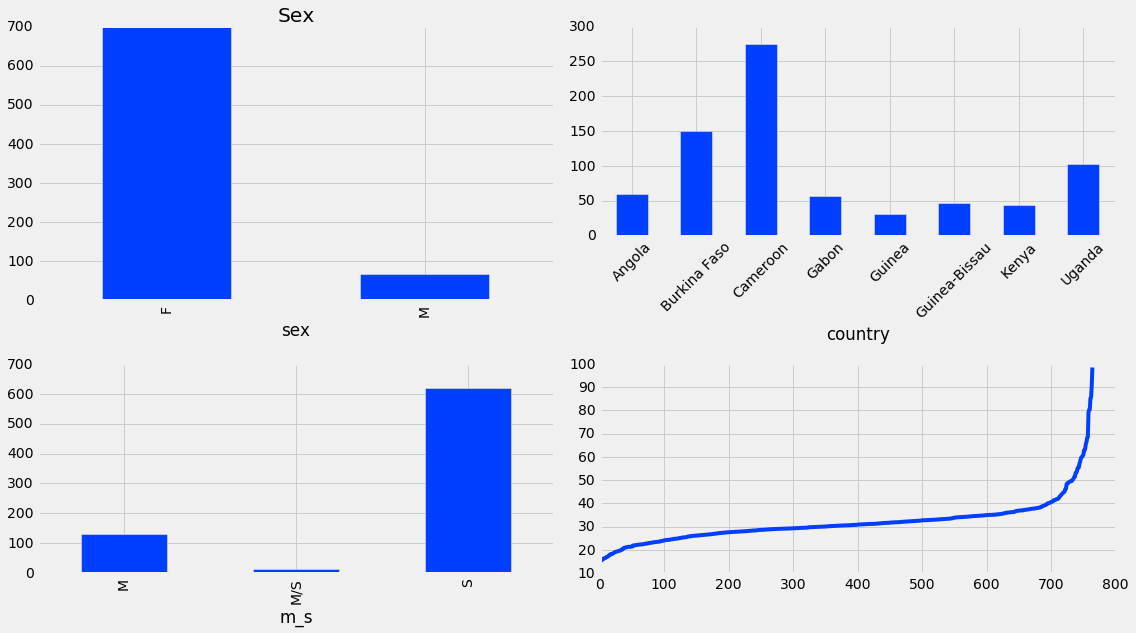

In [140]:
colormap = plt.get_cmap()
print(colormap)
with plt.style.context('seaborn-bright'):
    fig, axs = plt.subplots(2, 2, squeeze=False, figsize=(16, 9))

    sex(ax=axs[0, 0])
    axs[0,0].set_title ('Sex')
    country(ax=axs[0, 1])
    ax = axs[0,1]
    ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
    
    form(ax=axs[1,0])
    axs[1,1].plot(coverage_vals)
    plt.tight_layout()
    bottom_left = axs[1, 0].axes.get_position()
    axs[0,0].axes.set_position([bottom_left.x0, 0.5240926751837101,
                                bottom_left.x1-bottom_left.x0, 0.1 + bottom_left.y1-bottom_left.y0])

In [126]:
xa = axs[0,0].properties()['xaxis']
axs[0,0].axes.get_position()
#axs[0,1].axes.get_position()
help(ax.axes.set_position)

Help on method set_position in module matplotlib.axes._base:

set_position(pos, which='both') method of matplotlib.axes._subplots.AxesSubplot instance
    Set the axes position with::
    
      pos = [left, bottom, width, height]
    
    in relative 0,1 coords, or *pos* can be a
    :class:`~matplotlib.transforms.Bbox`
    
    There are two position variables: one which is ultimately
    used, but which may be modified by :meth:`apply_aspect`, and a
    second which is the starting point for :meth:`apply_aspect`.
    
    
    Optional keyword arguments:
      *which*
    
        ==========   ====================
        value        description
        ==========   ====================
        'active'     to change the first
        'original'   to change the second
        'both'       to change both
        ==========   ====================



In [ ]:
9